In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [412]:
data = pd.read_csv("insurance.csv")

In [413]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [414]:
# data missing_values
data.isnull().any().sum()

0

# Veri setinde eksik bir veri olmadığını gözlemledik.

Vücut kitle indeksi ortalaması 30.66, standard sapma değeri 6.1


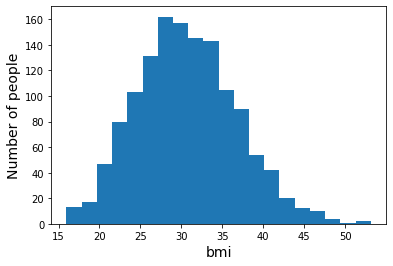

'\nBMI Categories:\nUnderweight = <18.5\nNormal weight = 18.5–24.9\nOverweight = 25–29.9\nObesity = BMI of 30 or greater\n'

In [415]:
plt.hist(data["bmi"],bins = 20)
plt.xlabel("bmi",fontsize=14)
plt.ylabel("Number of people",fontsize=14)
bmi_mean = np.mean(data["bmi"])
bmi_std = np.std(data["bmi"])
print(f"Vücut kitle indeksi ortalaması {round(bmi_mean,2)}, standard sapma değeri {round(bmi_std,2)}")
plt.show()
"""
BMI Categories:
Underweight = <18.5
Normal weight = 18.5–24.9
Overweight = 25–29.9
Obesity = BMI of 30 or greater
"""


# Bmi dağılımı Gauss Dağılımı(Normal Dağılım) şeklindedir.
# Vücut kitle indeksinde obezite yoğunlaşması görülmüştür.

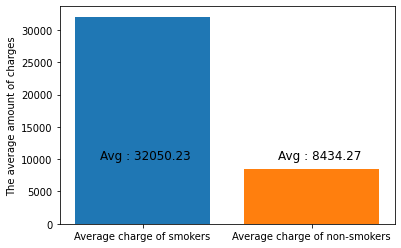

In [416]:
smoker_number = data["smoker"].value_counts()["yes"]
non_smoker_number = data["smoker"].value_counts()["no"]
"""
smoker_number
no     1064
yes     274
"""
smoker_total_charges = data[data["smoker"]=="yes"]["charges"].sum()
non_smoker_total_charges = data[data["smoker"]=="no"]["charges"].sum()

avg_charges_of_smokers = smoker_total_charges / smoker_number
avg_charges_of_non_smokers = non_smoker_total_charges / non_smoker_number

plt.bar("Average charge of smokers",avg_charges_of_smokers)
plt.bar("Average charge of non-smokers",avg_charges_of_non_smokers)
plt.ylabel("The average amount of charges")
plt.text(-0.25,10000,"Avg : " + str(round(avg_charges_of_smokers,2)),fontsize=12)
plt.text(0.8,10000,"Avg : " + str(round(avg_charges_of_non_smokers,2)),fontsize=12)
plt.show()

# Sigara içen insanların ödediği miktar sigara içmeyenlerin ödediği miktarın neredeyse 4 katıdır.
# Sigara tüketiminin sigorta ödeme miktarıyla doğrudan bir ilişki olduğu gözlemlenmiştir.

Text(0.5, 1.0, 'Bölgelere göre sigara içme yüzdeleri')

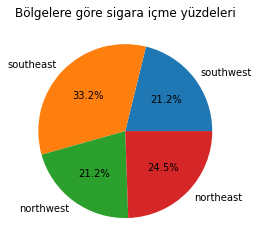

In [417]:
region_smoker_number= []
for region in data["region"].unique():
    number = data[data["region"] == region]["smoker"].value_counts()["yes"]
    region_smoker_number.append(number)
    #print("The smoker number of ",region," ",number,end=",")
    
plt.pie(region_smoker_number, labels=data["region"].unique(),autopct='%1.1f%%')
plt.title("Bölgelere göre sigara içme yüzdeleri")

# En fazla sigara içen insanların bulunduğu bölge Southeast bölgesidir.

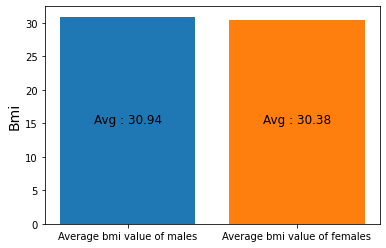

In [418]:
male_avg_bmi_value = data[data["sex"]=="male"]["bmi"].mean()
female_avg_bmi_value = data[data["sex"]=="female"]["bmi"].mean()

plt.bar("Average bmi value of males",male_avg_bmi_value)
plt.bar("Average bmi value of females",female_avg_bmi_value)
plt.ylabel("Bmi",fontsize=14)
plt.text(-0.2,15,"Avg : " + str(round(male_avg_bmi_value,2)),fontsize=12)
plt.text(0.8,15,"Avg : " + str(round(female_avg_bmi_value,2)),fontsize=12)
plt.show()

# Cinsiyetler göre ortalaması alınan bmi değerlerinin birbirine oldukça yakın olduğu görülmektedir.

In [419]:
# Max children olan bölgeyi bulma
max_children_region = data.groupby(["region"]).sum()["children"].idxmax()
print("En çok çocuk sayısının olduğu bölge:",max_children_region,end="\n\n")

data.groupby(["region"])["children"].sum()

En çok çocuk sayısının olduğu bölge: southeast



region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

# En çok çocuk sayısının olduğu bölge: southeast

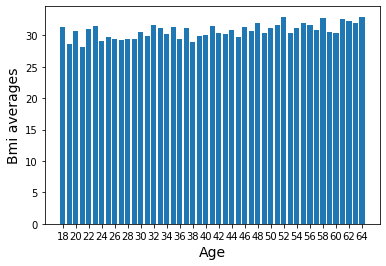

In [420]:
# Age ile Bmi arasındaki ilişki
avg_bmi_for_ages = data.groupby("age").mean()["bmi"]
plt.bar(avg_bmi_for_ages.index,avg_bmi_for_ages)
plt.xticks(range(data["age"].min(),data["age"].max()+2,2))
plt.xlabel("Age",fontsize=14)
plt.ylabel("Bmi averages",fontsize=14)
plt.show()

In [468]:
bmi_age_data = data[["age","bmi"]]
bmi_age_data.corr()

,age,bmi
age,1.000000,0.109894
bmi,0.109894,1.000000


# Bmi değeri ile yaş arasında anlamlı bir ilişki tespit edilememiştir. 

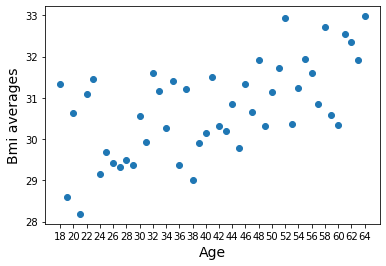

In [421]:
avg_bmi_for_ages = data.groupby("age").mean()["bmi"]
plt.scatter(avg_bmi_for_ages.index,avg_bmi_for_ages)
plt.xticks(range(data["age"].min(),data["age"].max()+2,2))
plt.xlabel("Age",fontsize=14)
plt.ylabel("Bmi averages",fontsize=14)
plt.show()
# Scatter grafiği ile de Bmi değeri ile yaş arasında bir ilişki tespit edilememiştir.

Text(0, 0.5, 'Average value of bmi ')

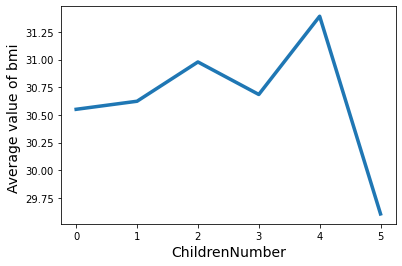

In [422]:
# children bmi arasındaki ilişki

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

children_number_list = []
avg_bmi_for_children_number_list = []

for children_number in selection_sort(data["children"].unique()):
    avg_bmi_for_children_number = data[data["children"] == children_number ]["bmi"].mean()
    children_number_list.append(children_number)
    avg_bmi_for_children_number_list.append(avg_bmi_for_children_number)
    #print(children_number,avg_bmi_for_children_number)
    
print()

plt.plot(children_number_list,avg_bmi_for_children_number_list,linewidth=3.5)
plt.xlabel("ChildrenNumber",fontsize=14)
plt.ylabel("Average value of bmi ",fontsize=14)

 Çocuk sayılarına göre kişi sayısıları şöyledir:
- Hiç çocuğu olmayan kişi sayısı: 574
- 1 çocuğu olan kişi sayısı: 324
- 2 çocuğu olan kişi sayısı: 240
- 3 çocuğu olan kişi sayısı: 157
- 4 çocuğu olan kişi sayısı: 25
- 5 çocuğu olan kişi sayısı: 18

4 ve 5 çocuğu olan kişi sayıları diğer sayıda çocuk sahibi olan kişi sayılarında çok daha az olduğu için dikkate alınmamıştır.
0, 1 ve 3 çocuğu olanların ortalama Bmi değerleri birbirine yakın iken, 
2 çocuğu olan kişilerin Bmi değerleri nispeten daha yüksektir.


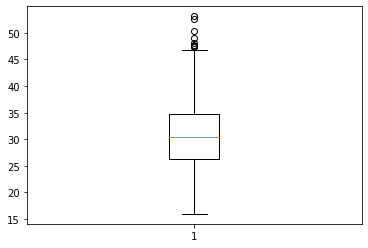

<Figure size 720x504 with 0 Axes>

In [423]:
# bmi değişkenindeki outlier değerler incelenecek.

plt.boxplot(data["bmi"])
fig = plt.figure(figsize =(10, 7))
plt.show()

Bmi değerlerinde outlier değerler olduğu boxplot ile gözlemlenmiştir.

Yüksek değerdeki Bmi değerleri Outlier olarak gözlemlenmiştir.



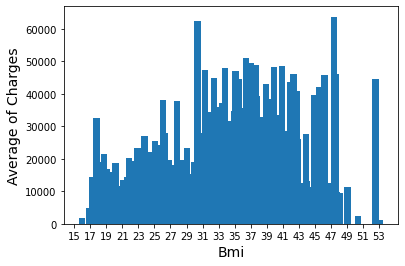

In [424]:
## bmi ve charges arasındaki ilişki

avg_charges_of_bmi = data.groupby("bmi").mean()["charges"]
plt.bar(avg_charges_of_bmi.index,avg_charges_of_bmi)
plt.xticks(range(int(data["bmi"].min()),int(data["bmi"].max()+2),2))
plt.xlabel("Bmi",fontsize=14)
plt.ylabel("Average of Charges",fontsize=14)
plt.show()

Bmi değerinin 30'dan yüksek olmaya başladı değerlerde Charges miktarında bir artış gözlemlense de, Charges miktarını tek etkileyen parametrenin Bmi olmadığı tespit edilmiştir.
Bmi'nin 17'nin altı ve 48'ün üzeri olduğu bölgelerde outlier değerler gözlemlenmiştir.

In [469]:
bmi_charges_data = data[["bmi","charges"]]
bmi_age_data.corr()

,age,bmi
age,1.000000,0.109894
bmi,0.109894,1.000000


([<matplotlib.axis.XTick at 0x7fa7c6b64ad0>,
 [Text(0, 0, 'northeast'),
  Text(0, 0, 'northwest'),
  Text(0, 0, 'southeast'),
  Text(0, 0, 'southwest')])

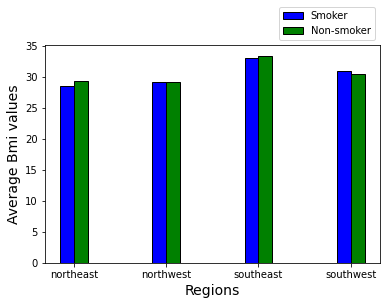

In [425]:
# region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceledik

people_in_regions = data["region"].value_counts()

smoker_data = data[data["smoker"]=="yes"]

avg_bmi_region_smokers = smoker_data.groupby("region")["bmi"].mean()

avg_bmi_region_smokers = list(avg_bmi_region_smokers[:])

non_smoker_data = data[data["smoker"]=="no"]

avg_bmi_region_non_smokers = non_smoker_data.groupby("region")["bmi"].mean()

regions = list(avg_bmi_region_non_smokers.index)

avg_bmi_region_non_smokers = list(avg_bmi_region_non_smokers[:])

plt.bar([0,2,4,6],avg_bmi_region_smokers,color='b',
        edgecolor='black',width = 0.3)
plt.bar([0.3,2.3,4.3,6.3],avg_bmi_region_non_smokers,width = 0.3,color='g',
        edgecolor='black')

plt.xlabel("Regions",fontsize = 14)
plt.ylabel("Average Bmi values",fontsize = 14)
plt.legend(["Smoker","Non-smoker"],loc=1,bbox_to_anchor=(1, 1.2))
plt.xticks([0.15,2.15,4.15,6.15],regions)

# Veri Ön İşleme Yapılması

In [426]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [427]:
# Cinsiyetlere LabelEncoding uygulaması

le = LabelEncoder()
# fit transform
data["sex"] = le.fit_transform(data["sex"])

In [428]:
# region sütununa OneHotEncoder işlemi uygulanması
data  =  pd.get_dummies(data, columns=["region"],prefix="", prefix_sep="")

In [429]:
# Smoker'lara LabelEncoding uygulanması
le = LabelEncoder()
# fit transform
data["smoker"] = le.fit_transform(data["smoker"])

In [430]:
data

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


# Veri setinin X_train,X_test, y_train, y_test olacak şekilde bölüştürülmesi

Elde edilen sonuçlara göre:

Bmi,
Smoker olup olmama durumu,
hangi bölgede yaşadığı, öenmli parametrelerdir.

Bmi 17'den küçük, 46'dan büyük değerleri çıkarılacak,
Children sayısı da 4 ve 5 olan toplam 43 satır silinecek.




In [431]:
data = data[data["bmi"] > 17]

In [432]:
data = data[data["bmi"] < 46]

Vücut kitle indeksi ortalaması 30.48, standard sapma değeri 5.79


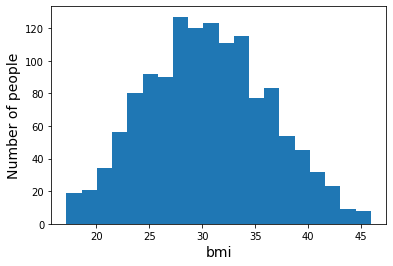

In [433]:
plt.hist(data["bmi"],bins = 20)
plt.xlabel("bmi",fontsize=14)
plt.ylabel("Number of people",fontsize=14)
bmi_mean = np.mean(data["bmi"])
bmi_std = np.std(data["bmi"])
print(f"Vücut kitle indeksi ortalaması {round(bmi_mean,2)}, standard sapma değeri {round(bmi_std,2)}")
plt.show()

Bmi değerlerinin outlier olanları veriden silinmiştir.

In [434]:
data = data[data["children"] < 4]

Çocuk sayılarının 4 ve üstü olan veri satılarının toplam sayısı hem az hem de outlier sonuçlar verebilecek türden olduğu için veri setinden atılmıştır.

In [435]:
data

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [436]:
columns = data.columns
print(columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')


In [437]:
data

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [438]:
X = data.loc[:, ['smoker', 'bmi', 'northeast',"northwest","southeast","southwest", "children","age","sex"]]
y = data.loc[:,"charges"]
#X = X.to_numpy()
y = y.to_numpy()

In [439]:
X

,smoker,bmi,northeast,northwest,southeast,southwest,children,age,sex
0,1,27.900,0,0,0,1,0,19,0
1,0,33.770,0,0,1,0,1,18,1
2,0,33.000,0,0,1,0,3,28,1
3,0,22.705,0,1,0,0,0,33,1
4,0,28.880,0,1,0,0,0,32,1
...,...,...,...,...,...,...,...,...,...
1333,0,30.970,0,1,0,0,3,50,1
1334,0,31.920,1,0,0,0,0,18,0
1335,0,36.850,0,0,1,0,0,18,0
1336,0,25.800,0,0,0,1,0,21,0


In [440]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [441]:
X

array([[1.        , 0.37293155, 0.        , ..., 0.        , 0.02173913,
        0.        ],
       [0.        , 0.57742554, 0.        , ..., 0.33333333, 0.        ,
        1.        ],
       [0.        , 0.55060094, 0.        , ..., 1.        , 0.2173913 ,
        1.        ],
       ...,
       [0.        , 0.68472392, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.29977356, 0.        , ..., 0.        , 0.06521739,
        0.        ],
       [1.        , 0.41369099, 0.        , ..., 0.        , 0.93478261,
        0.        ]])

In [442]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [443]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [444]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [445]:
X_train.shape

(1021, 9)

In [446]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

In [447]:
import sklearn.metrics
from sklearn.model_selection import cross_val_score
linear_regression_model_dogrulama = cross_val_score(estimator=linear_regression_model, X=X_train,y=y_train, scoring='r2', cv=5)

In [448]:
linear_regression_model_dogrulama

array([0.73329057, 0.76365101, 0.7954085 , 0.72195528, 0.73721688])

In [449]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias=False )
#X_poly = poly.fit_transform(X)
  
#pr_model = LinearRegression()
#pr_model.fit(X_poly,y)
#y_pred = pr_model.predict(X_poly)
poly

PolynomialFeatures(include_bias=False)

In [450]:
X_polynom = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_polynom, y_train)
y_predicted = poly_reg_model.predict(poly.fit_transform(X_test))

In [451]:
from sklearn.model_selection import cross_val_score
polynomical_regression_model_dogrulama = cross_val_score(estimator=poly_reg_model, X=X_polynom, y=y_train, scoring='r2', cv=5)

In [452]:
polynomical_regression_model_dogrulama

array([0.80857972, 0.85924045, 0.85973814, 0.83138849, 0.82128894])

from tensorflow.keras import Sequential
model = Sequential(name = "insurance")
from tensorflow.keras.layers import Dense
model.add(Dense(32,activation = 'relu', input_dim= 9, name="Hidden-1" ))
model.add(Dense(32,activation = 'relu', name="Hidden-2" ))
model.add(Dense(1,activation='linear', name="output"))

In [453]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

tree_pred = decision_tree_model.predict(X_test)

In [454]:
decision_tree_model_dogrulama = cross_val_score(estimator=decision_tree_model, X=X_train, y=y_train, scoring='r2', cv=5)

In [455]:
decision_tree_model_dogrulama

array([0.67389415, 0.81092843, 0.7124096 , 0.68885752, 0.66978544])

Çapraz doğrulama yapılarak en iyi performans gösteren model seçilecektir.

In [456]:
print("Linear Regression Cross Validation Results: ",linear_regression_model_dogrulama)
print("Polynomical Regression Cross Validation Results: ",polynomical_regression_model_dogrulama)
print("Decision Tree Cross Validation Results: ",decision_tree_model_dogrulama)

Linear Regression Cross Validation Results:  [0.73329057 0.76365101 0.7954085  0.72195528 0.73721688]
Polynomical Regression Cross Validation Results:  [0.80857972 0.85924045 0.85973814 0.83138849 0.82128894]
Decision Tree Cross Validation Results:  [0.67389415 0.81092843 0.7124096  0.68885752 0.66978544]


Buradan yaptığımız çıkarım ile Polynomical Regression modelinin daha iyi kestirimde bulunacağı kararına vardık.

Polynomical Regression modeli için GridSearch yöntemi ile parametre optimizasyonu gerçekleştirildi.

In [457]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=2022)

In [458]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures( )
X_polynom = poly.fit_transform(X_train)
poly_reg_model_2 = LinearRegression()

In [459]:
search_space = { 
    "degree" : np.arange(2,5)

}

    "n_estimators" : [100, 200, 300],
    "learning_rate" : [0.001, 0.01, 0.1, 1],
    "gamma" : [0.01, 0.1],
    "max_depth" : [3, 6, 9]

    Yukarıdaki ifadeler de optimize edilme amacı ile alınmış fakat sonuçlar tatmin edici olmadığından sonradan çıkarılmıştır.

In [460]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator=xgb_model,
                  param_grid=search_space,
                  scoring=["r2","neg_root_mean_squared_error"],
                  refit="r2",
                  cv=5, 
                  )

In [461]:
GS.fit(X_polynom, y_train)

[17:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(random_state=2022),
             param_grid={'degree': array([2, 3, 4])}, refit='r2',
             scoring=['r2', 'neg_root_mean_squared_error'])

In [462]:
print(GS.best_params_)

{'degree': 2}


In [463]:
print(GS.best_score_)

0.8516127852740281


In [464]:
poly2 = PolynomialFeatures(degree = 1)
X_polynom2 = poly.fit_transform(X_train)
poly_reg_model2 = LinearRegression()
poly_reg_model2.fit(X_polynom2, y_train)
y_predicted2 = poly_reg_model2.predict(poly.fit_transform(X_test))
r2 = sklearn.metrics.r2_score(y_test, y_predicted)
mae = sklearn.metrics.mean_absolute_error(y_test, y_predicted)
mse = sklearn.metrics.mean_squared_error(y_test, y_predicted)
print("R2:",r2)
print("MAE:",mae)
print("MSE:",mse)

R2: 0.841604033783445
MAE: 2866.478925078125
MSE: 25081894.96489147


Polynomical Regression modelimizin yapacağı tahmin işlemlerinde gerçek değere ortalama olarak %84'lük oranda yakınsayacağı görülüyor. 